In [1]:
import matplotlib.pyplot as plt
from monte_carlo.extreme_learning import *

In [31]:
basis = TrigBasis(1, (0, 100), (-1, 0))

In [80]:
N = 1000
node_count = 80
fn = lambda xs: np.sin(40 * xs)*np.sin(10*xs) + 1
xs = np.random.rand(N).reshape(N, 1)*2
values = fn(xs) + (np.random.rand(N).reshape(N, 1) - .5) / 2
params, weights = basis.extreme_learning_train(xs, values, node_count)

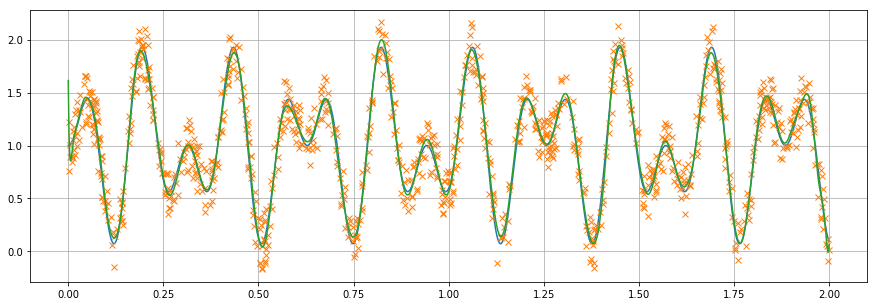

In [81]:
plt.figure(figsize=(15, 5))

x = np.linspace(0, 1, 1000) * 2
plt.plot(x, fn(x))
plt.plot(xs, values, 'x')
plt.plot(x, basis.eval(x.reshape(1000,1), params, weights))
# plt.plot(-params[0], [-1.5]*node_count, '+')
plt.grid()

plt.show()